# Preprocessing data

The objective of this notebook is to introduce how to preprocess data. Data Preprocessing is a technique that is used to transform our data from one format to another that is more suitable for analysis. The data transformations are typically applied to distinct entities (e.g. fields, rows, columns, data values etc.) within a data set, and could include such actions as parsing, filtering, normalization, standarization, etc.

* **Example.** In the "Automobile" dataset, what is the fuel consumption (L/100k) rate for the diesel car?
* **Example.** What should we do with missing values?

#### Required libraries
* <a href = "https://pandas.pydata.org/"><code>Pandas</code></a>
* <a href = "https://www.scipy.org/"><code>Scipy</code></a> 
* <a href = "https://numpy.org/"><code>Numpy</code></a> 
* <a href = "https://numpy.org/"><code>Scikit-learn</code></a>
* <a href = "https://matplotlib.org/"><code>Matplotlib</code></a>

#### Table of contents
<ol>
    <li><a href="#identify_handle_missing_values">Identify and handle missing values</a><br>
        1.1. <a href="#identify_missing_values">Identify missing values</a><br>
        1.2. <a href="#deal_missing_values">Deal with missing values</a><br>
    </li>
    <li><a href="#data_formatting">Data formatting</a></li>
    <li><a href="#data_transformation">Data transformation</a><br>
        3.1. <a href="#feature_scaling">Feature scaling</a><br>
        3.2. <a href="#transforming_data_to_normality">Transforming data to normality</a>
    </li>
    <li><a href="#data_binning">Data binning</a></li>
    <li><a href="#indicator_variables">Indicator variables</a></li>
</ol>

----

<h2 id="identify_handle_missing_values">1 - Identify and handle missing values</h2>


<h3 id="identify_missing_values">1.1 - Identify missing values</h3>
In the <code>Automobile</code> dataset, missing data comes with the question mark "?". We replace "?" with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience:

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("automobile_nomissing.csv")

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:

* <code>.isnull()</code>
* <code>.notnull()</code>

The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [2]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Count missing values in each column
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, <code>True</code> represents a missing value, <code>False</code> means the value is present in the dataset.  In the body of the for loop the method  <code>.value_counts()</code> counts the number of <code>True</code> values. 

In [3]:
for column in missing_data.columns:
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
symboling
False    201
Name: count, dtype: int64

normalized-losses
normalized-losses
False    201
Name: count, dtype: int64

make
make
False    201
Name: count, dtype: int64

fuel-type
fuel-type
False    201
Name: count, dtype: int64

aspiration
aspiration
False    201
Name: count, dtype: int64

num-of-doors
num-of-doors
False    201
Name: count, dtype: int64

body-style
body-style
False    201
Name: count, dtype: int64

drive-wheels
drive-wheels
False    201
Name: count, dtype: int64

engine-location
engine-location
False    201
Name: count, dtype: int64

wheel-base
wheel-base
False    201
Name: count, dtype: int64

length
length
False    201
Name: count, dtype: int64

width
width
False    201
Name: count, dtype: int64

height
height
False    201
Name: count, dtype: int64

curb-weight
curb-weight
False    201
Name: count, dtype: int64

engine-type
engine-type
False    201
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    201
Name: count, dtype: int64

en

Another alternative is to use a list comprehension to create a list of tuples (column_name, count):

In [4]:
true_counts = [(column, missing_data[column].values.sum()) for column in missing_data.columns]
false_counts = [(column, (~missing_data[column].values).sum()) for column in missing_data.columns]
true_counts.sort(key=lambda x:x[1], reverse = True)
true_counts

[('symboling', 0),
 ('normalized-losses', 0),
 ('make', 0),
 ('fuel-type', 0),
 ('aspiration', 0),
 ('num-of-doors', 0),
 ('body-style', 0),
 ('drive-wheels', 0),
 ('engine-location', 0),
 ('wheel-base', 0),
 ('length', 0),
 ('width', 0),
 ('height', 0),
 ('curb-weight', 0),
 ('engine-type', 0),
 ('num-of-cylinders', 0),
 ('engine-size', 0),
 ('fuel-system', 0),
 ('bore', 0),
 ('stroke', 0),
 ('compression-ratio', 0),
 ('horsepower', 0),
 ('peak-rpm', 0),
 ('city-mpg', 0),
 ('highway-mpg', 0),
 ('price', 0)]

Based on the summary above, each column has 205 rows of data, seven columns containing missing data:

* "normalized-losses": 41 missing data
* "num-of-doors": 2 missing data
* "bore": 4 missing data
* "stroke" : 4 missing data
* "horsepower": 2 missing data
* "peak-rpm": 2 missing data
* "price": 4 missing data


<h3 id="deal_missing_values">1.2 - Deal with missing data</h3>
When dealing with missing data we have several options we have two options, drop or imputation, depending on the situation and our objective we should apply one or the other.

#### Drop data
Whole columns should be dropped only if most entries in the column are empty (same goes for rows). In our dataset, none of the columns are empty enough to drop entirely. There are, however, 4 rows with missing data in the "price" column. One way to solve this would be to simply drop those rows.

In order to drop a specific column, we simply use the <code>drop</code> method in <code>DataFrame</code> (independently of its missing values):

In [5]:
# Drop the normalized-losses column

print(df.shape)
column_dropped_df = df.drop(columns=["normalized-losses"])
print(column_dropped_df.shape)

(201, 26)
(201, 25)


If we want to drop only the columns with missing values, we can simply use the method <code>dropna</code> in <code>DataFrame</code>:

In [6]:
print(df.shape)
column_dropped_df = df.dropna(axis='rows')
print(column_dropped_df.shape)

(201, 26)
(201, 26)


Finally we can drop those rows that have a missing value in the an specific attribute (i.e., "price")

In [7]:
print(df.shape)
row_dropped_df = df.dropna(subset=["price"])
print(row_dropped_df.shape)

(201, 26)
(201, 26)


#### Impute data
Discarding entire rows and/or columns containing missing values comes at the price of losing data which may be valuable (even though incomplete). A better strategy is to impute those values, i.e., to infer them from the known part of the data.

One type of imputation algorithm is univariate, which imputes values in the i-th feature dimension using only non-missing values in that feature dimension. By contrast, multivariate imputation algorithms use the entire set of available feature dimensions to estimate the missing values.

**Univariate imputation**

The <code>SimpleImputer</code> class provides basic univariate strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.

In [8]:
from sklearn.impute import SimpleImputer

print("normalized-losses mean: " +str(df['normalized-losses'].astype('float').mean(axis=0)))

mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_normalized_losses = mean_imputer.fit_transform(df[["normalized-losses"]]) # It expects DataFrame (not a Series object)
pd.DataFrame(imputed_normalized_losses).head(5)

normalized-losses mean: 122.0


,0
0,122.0
1,122.0
2,122.0
3,164.0
4,164.0


In [9]:
print("most frequent num-doors value: " + str(df['num-of-doors'].value_counts().idxmax()))

freq_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputed_num_doors = freq_imputer.fit_transform(df[["num-of-doors"]]) # It expects DataFrame (not a Series object)
pd.DataFrame(imputed_num_doors).head(5)

most frequent num-doors value: four


,0
0,two
1,two
2,two
3,four
4,four


**Multivariate imputation**

A more sophisticated approach is to use multivariate imputation where we use information from other data attributes to impute the value.
* <code>IterativeImputer</code> models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A **regressor** (*linear*, *Random Forest*, etc.) is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.
* <code>KNNImputer</code> provides imputation for filling in missing values using the k-Nearest Neighbors approach. Each missing feature is imputed using values from nearest neighbors that have a value for the feature. If a sample has more than one feature missing, then the neighbors for that sample can be different depending on the particular feature being imputed.

**Other imputation approaches**

There multiple methods of imputation, another common approach is the <a href="https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm">**expectation-maximization**</a> (EM) algorithm, which can be used with discrete and continuous data. We will not cover it in this tutorial.

----

**Question: Which one should we choose?**

(double click for solution)

<!--
There isn't a "best" method. If possible, the best alternative is to test all of them on our data. Some methods could work better on a DataSet and worse in another. For example:

<img src="images/example_imputer.png" width="800">
-->

----

**Back to our example**

Given the introductory nature of this tutorial, we are going to opt for simplicity. Therefore we are going to use univariate imputation, where continuous missing values are going to be replaced by the mean value of its column, and discrete missing values are going to be replaced by the most frequent value of the column. In addition, we are goin to drop those rows with a missing value in the "price" attribute.

In [10]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
freq_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df["normalized-losses"] = mean_imputer.fit_transform(df[["normalized-losses"]])
df["bore"] = mean_imputer.fit_transform(df[["bore"]])
df["stroke"] = mean_imputer.fit_transform(df[["stroke"]])
df["horsepower"] = mean_imputer.fit_transform(df[["horsepower"]])
df["peak-rpm"] = mean_imputer.fit_transform(df[["peak-rpm"]])
df = df.dropna(subset=["price"])
df.shape

(201, 26)

### Before we continue...
Lets just save our imputed dataset

In [11]:
df.to_csv('automobile_nomissing.csv', index=False)

<h2 id="data_formatting">2 - Data formatting</h2>
An important step when cleaning our data is to check and make sure that all data is in the correct format (int, float, text or other). In Pandas, we use 

* <code>.dtypes</code> attribute to check the data types
* <code>.astype()</code> to change a data type

In [12]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

As we can see above, some columns are not of the correct data type. Numerical variables should have type <code>float</code> or <code>int</code>, and variables with strings such as categories should have type <code>object</code>. For example, "price" should be <code>float</code> and "normalized-losses" should be <code>int</code>.

In [13]:
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("int")
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

**Note:** you will notice that most of the types are in 64 bits. In this example we could reduce it to 32 bits given that we dont require that much precision.

#### Feature transformation

Data is usually collected from different agencies with different formats. It may be interesting to transform this data into a common format that allows the researcher to make meaningful comparisons.

**Example:** Transform mpg to L/100km

In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accept the fuel consumption with L/100km standard.

The formula for unit conversion is

$$ L/100km = \frac{235}{mpg}$$

We can do many mathematical operations directly in Pandas.

In [14]:
df[["city-mpg", "highway-mpg"]].head(5)

,city-mpg,highway-mpg
0,21,27
1,21,27
2,19,26
3,24,30
4,18,22


In [15]:
df["city-L/100km"] = 235/df["city-mpg"]
df["highway-L/100km"] = 235/df["highway-mpg"]
df[["city-L/100km", "highway-L/100km"]].head(5)

,city-L/100km,highway-L/100km
0,11.190476,8.703704
1,11.190476,8.703704
2,12.368421,9.038462
3,9.791667,7.833333
4,13.055556,10.681818


In [16]:
print(df.shape) # 2 new columns have been added

(201, 28)


<h2 id="data_normalization">3 - Data transformation</h2>

<h3 id="feature_scaling">3.1 - Feature scaling</h3>


In [17]:
#create columns of various distributions
fs_df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(-10, 10, 1000),     # normal leptokurtic
})

# make bimodal distribution
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

fs_df['bimodal'] = bimodal

# create list of column names to use later
col_names = list(fs_df.columns)

<Axes: >

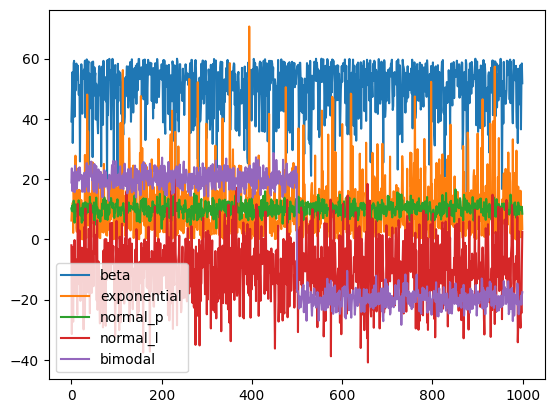

In [18]:
fs_df.plot()

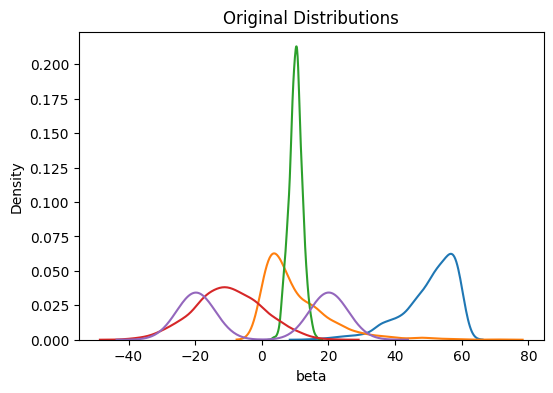

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot original distribution plot
fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))
ax1.set_title('Original Distributions')

sns.kdeplot(fs_df['beta'], ax=ax1)
sns.kdeplot(fs_df['exponential'], ax=ax1)
sns.kdeplot(fs_df['normal_p'], ax=ax1)
sns.kdeplot(fs_df['normal_l'], ax=ax1)
sns.kdeplot(fs_df['bimodal'], ax=ax1);

#### Standard scaler
Also known as feature standarization, it makes the values of each feature in the data have **zero-mean** and **unit-variance**. The reasoning behind it is that if a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function of an estimator and make it unable to learn from other features correctly. For example, it may be applied before using a L1 normalizer in linear regresison or before applying principal component analysis (PCA).

While it assumes that data follows a Gaussian distribution, in practice we often ignore the shape of the distribution and just transform the data to center it:

$$\mathbf{x}' = \frac{\mathbf{x} - \mathbf{\bar{x}}}{\sigma(\mathbf{x})}$$

<Axes: title={'center': 'After StandardScaler'}, xlabel='beta', ylabel='Density'>

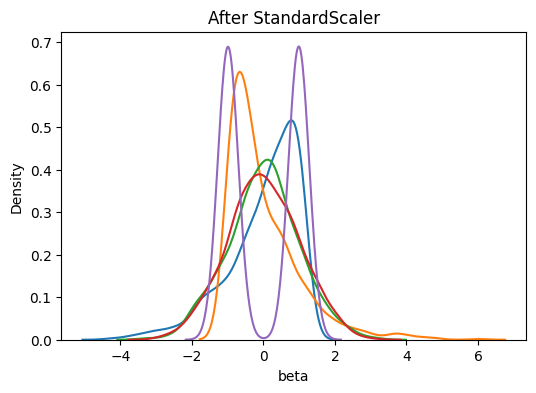

In [20]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

s_scaler = StandardScaler()
df_s = s_scaler.fit_transform(fs_df)

df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))
ax1.set_title('After StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)
sns.kdeplot(df_s['bimodal'], ax=ax1)

#### Min-max scaler
This method scales a feature in a user-specified range.  Selecting the target range depends on the nature of the data. Its general formula is given as:

$$\mathbf{x}' = \frac{\mathbf{x} - min(\mathbf{x})}{max(\mathbf{x}) - min(\mathbf{x})}$$

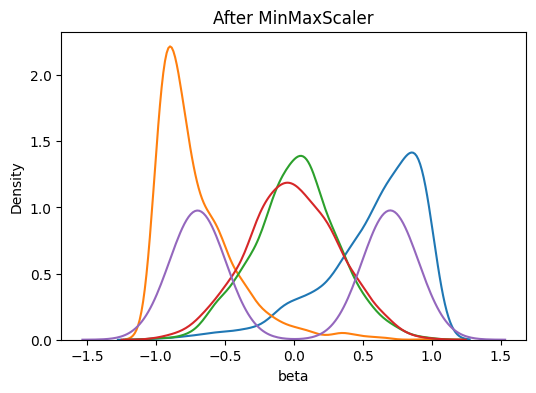

In [21]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

mm_scaler = MinMaxScaler(feature_range=(-1,1))
df_mm = mm_scaler.fit_transform(fs_df)

df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))
ax1.set_title('After MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)
sns.kdeplot(df_mm['bimodal'], ax=ax1);

#### Robust scaler
This scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile $Q_{1}(\mathbf{x})$ and the 3rd quartile $Q_{3}(\mathbf{x})$:

$$\mathbf{x}' = \frac{\mathbf{x} - Q_{1}(\mathbf{x})}{Q_{3}(\mathbf{x}) - Q_{1}(\mathbf{x})}$$

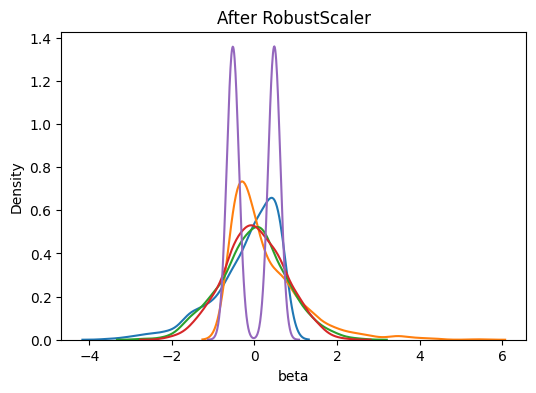

In [22]:
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

r_scaler = RobustScaler()
df_r = r_scaler.fit_transform(fs_df)

df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))
ax1.set_title('After RobustScaler')

sns.kdeplot(df_r['beta'], ax=ax1)
sns.kdeplot(df_r['exponential'], ax=ax1)
sns.kdeplot(df_r['normal_p'], ax=ax1)
sns.kdeplot(df_r['normal_l'], ax=ax1)
sns.kdeplot(df_r['bimodal'], ax=ax1);

#### The influence of outliers

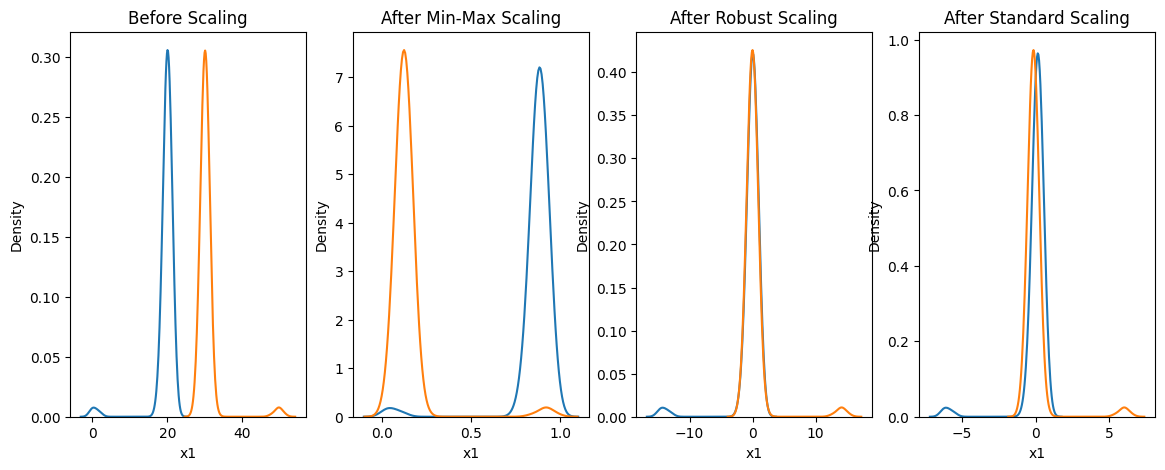

In [23]:
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['x1', 'x2'])

scaler = preprocessing.StandardScaler()
standard_scaled_df = scaler.fit_transform(x)
standard_scaled_df = pd.DataFrame(standard_scaled_df, columns=['x1', 'x2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(14, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1)
sns.kdeplot(x['x2'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['x1'], ax=ax2)
sns.kdeplot(minmax_scaled_df['x2'], ax=ax2)
ax3.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['x1'], ax=ax3)
sns.kdeplot(robust_scaled_df['x2'], ax=ax3)
ax4.set_title('After Standard Scaling')
sns.kdeplot(standard_scaled_df['x1'], ax=ax4)
sns.kdeplot(standard_scaled_df['x2'], ax=ax4)
plt.show()

<h3 id="transforming_data_to_normality">3.2 - Transforming data to normality</h3>

One of the most common assumptions for statistical analyses is that of normality, with nearly all parametric analyses requiring this assumption in one way or another. Power transforms are a family of parametric, monotonic transformations that aim to map data from any distribution to as close to a Gaussian distribution as possible in order to stabilize variance and minimize skewness. Some of the most common power transforms are:

* <a href="https://en.wikipedia.org/wiki/Power_transform#Yeo%E2%80%93Johnson_transformation">The Yeo-Johnson transformation</a> (<code>sklearn.preprocessing.PowerTransformer(method="yeo-johnson")</code>)
* <a href="https://en.wikipedia.org/wiki/Power_transform#Box%E2%80%93Cox_transformation">The Box–Cox transformation</a> (<code>sklearn.preprocessing.PowerTransformer(method="box-cox")</code>)
* <a href="https://stats.stackexchange.com/questions/325570/quantile-transformation-with-gaussian-distribution-sklearn-implementation/327102">Quantile transformation</a> (<code>sklearn.preprocessing.QuantileTransformer</code>)

Below are examples of Box-Cox and Yeo-Johnson applied to various probability distributions. Note that when applied to certain distributions, the power transforms achieve very Gaussian-like results, but with others, they are ineffective. This highlights the importance of visualizing the data before and after transformation.

<img src="images/power_transform.png" width="700">

### Discussion and a word of caution

The usual advice when considering which transformer to use is the following:

* Use min-max scaler as your default.
* Use robust scaler if you have outliers and can handle a larger range.
* Transform your data to normality and/or use standard scaler when your method specifically requires it.

However, it is also interesting to learn our model using different transformations and compare their results.

Finally, keep in mind that there is a "hidden" tradeoff in data transformation. It may now be centered and or normal, but interpreting that data may be much more difficult because you have to consider the previously applied transformations. 

<h2 id="data_binning">4 - Data binning</h2>

Binning is a process of transforming continuous numerical variables into discrete categorical "bins". It can be done in a supervised or unsupervised manner. We are going to focus on the latter, which can be mainly divided in two approaches:
* **Equal-width**. The algorithm divides the data into $k$ intervals of equal size.
    * Pros: maintains the form of the distribution.
    * Cons: very sensitive to outliers.
* **Equal-frequency**. The algorithm divides the data into $k$ groups which each group contains approximately same number of values.
    * Pros: resist outliers better.
    * Cons: the marginal distribution becomes uniform.

In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? 

We will use the scikit-learn to segment the 'horsepower' column into 3 bins. Both equal-width and equal-frequency methods can be found in the <code>sklearn.preprocessing.KBinsDiscretizer</code> class.

Cut points: [array([ 48.        , 119.33333333, 190.66666667, 262.        ])]


/Users/ricardo/Documents/machine-learning-master/notebooks/.venv/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


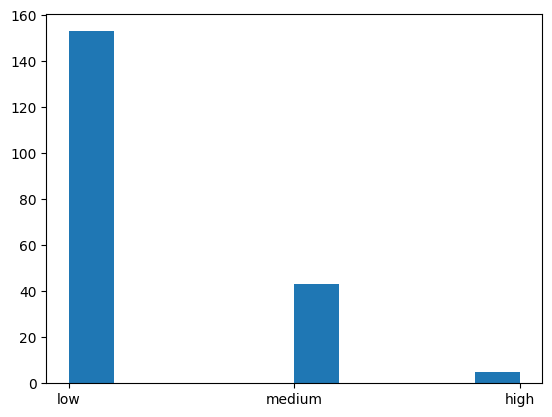

In [24]:
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt

equal_with_disc = KBinsDiscretizer(n_bins=3, strategy="uniform", encode="ordinal") # 'encode' is the method to encode the transformed result
equal_width_data = equal_with_disc.fit_transform(df[["horsepower"]])

# Transform the result into a categorical variable and name each bin
equal_width_data = pd.DataFrame(equal_width_data, columns=["horsepower-binned"])
equal_width_data["horsepower-binned"] = equal_width_data["horsepower-binned"].astype(int)
equal_width_data["horsepower-binned"] = pd.Categorical(equal_width_data["horsepower-binned"]).rename_categories(["low", "medium", "high"])

# Plot the resulting discrete variable
print("Cut points: " + str(equal_with_disc.bin_edges_))
plt.hist(equal_width_data["horsepower-binned"])
plt.show()

Cut points: [array([ 48.,  82., 111., 262.])]


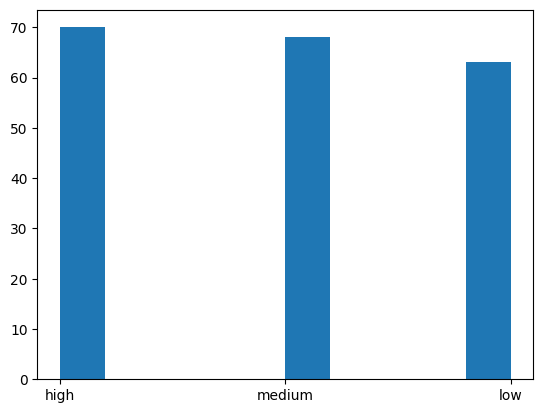

In [25]:
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt

equal_freq_disc = KBinsDiscretizer(n_bins=3, strategy="quantile", encode="ordinal") # 'encode' is the method to encode the transformed result
equal_freq_data = equal_freq_disc.fit_transform(df[["horsepower"]])

# Transform the result into a categorical variable and name each bin
equal_freq_data = pd.DataFrame(equal_freq_data, columns=["horsepower-binned"])
equal_freq_data["horsepower-binned"] = equal_freq_data["horsepower-binned"].astype(int)
equal_freq_data["horsepower-binned"] = pd.Categorical(equal_freq_data["horsepower-binned"]).rename_categories(["low", "medium", "high"])

# Plot the resulting discrete variable
print("Cut points: " + str(equal_freq_disc.bin_edges_))
plt.hist(equal_freq_data["horsepower-binned"])
plt.show()

<h2 id="indicator_variables">5 -Indicator variables</h2>

An indicator variable (or dummy variable) is a numerical variable that represents the presence or absence of some categorical label. 

#### How many dummy variables?

The number of dummy variables required to represent a particular categorical variable depends on the number of values that the categorical variable can assume. To represent a categorical variable that can assume $k$ different values, we would need to define $k - 1$ dummy variables. A $k^{th}$ dummy variable is redundant (it carries no new information) and creates a redundancy problem for the analysis (multicollinearity).

#### Why not just use an integer variable?

* **Ordinal variables**. Lets assume we have a categorical variable called "speed" with "low", "medium" and "high" labels. We may argue that the relation "low" < "medium" < "high" makes sense and therefore, using labels 1, 2 and 3 should not be an issue. However, using labels as 100, 101 and 300000 in place of 1, 2 and 3 would still have the same relationship as "low", "medium" and "high" have. In other words, we do not know how greater is a speed of "medium" than a speed of "low" and how small it is compared to a "high" speed (and if we know, then they should have been recorded with quantitative values). Difference between these labels can potentially affect the model we train.

* **Nominal variables**. This case is even worse, because its not possible to assign a quantitative value to variables such as color, brands, types of motor, etc.

#### In our data
In the Automobile data, we would like to use the information of "fuel-type" and "drive-wheels", two nominal variables, in a regression model, therefore we need to convert them into indicator variables.

**Fuel type**

In [26]:
fuel_type_dummy = pd.get_dummies(df["fuel-type"], drop_first = True) # We use drop_first to avoid multicollinearity
print(fuel_type_dummy.shape)
print(fuel_type_dummy.dtypes) # For a {0,1} variable, we dont need that many bits (int32)
fuel_type_dummy.head(5)

(201, 1)
gas    bool
dtype: object


,gas
0,True
1,True
2,True
3,True
4,True


Given this is a two-variables example, it could also be done by simply calling the <code>factorize()</code> method, which would return the same result

In [27]:
df["fuel-type"].factorize()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0]),
 Index(['gas', 'diesel'], dtype='object'))

**Drive-wheels**

This one is more interesting because it has 3 values and thus we have to create two dummy variables to fully represent it.

In [28]:
drive_wheels_dummy = pd.get_dummies(df["drive-wheels"], drop_first = True)
print(drive_wheels_dummy.shape)
print(drive_wheels_dummy.dtypes) 
drive_wheels_dummy.head(5)

(201, 2)
fwd    bool
rwd    bool
dtype: object


,fwd,rwd
0,False,True
1,False,True
2,False,True
3,True,False
4,False,False


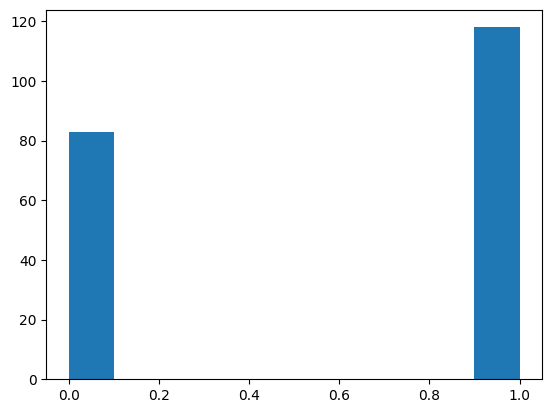

In [29]:
plt.hist(drive_wheels_dummy["fwd"].astype(int))
plt.show()

We could now add these variables to our dataset and drop the original categorical one.

In [30]:
df = pd.concat([df, drive_wheels_dummy], axis=1)
df.drop("drive-wheels", axis = 1, inplace=True)

In [31]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
city-L/100km         float64
highway-L/100km      float64
fwd                     bool
rwd                     bool
dtype: object

## References

#### Books
1. Bishop, C. M. (2006). "Pattern recognition and machine learning". Springer.
2. Murphy, K. P. (2012). "Machine Learning: A probabilistic perspective". MIT Press.
3. Stockburger D. W. (2016). "Multivariate statistics: concepts, models and applications".

#### Links
1. <a href="https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02">Hale, J. (2019). "Scale, Standardize, or Normalize with Scikit-Learn"</a>
3. <a href="http://benalexkeen.com/feature-scaling-with-scikit-learn/">Keen, B. (2017). "Feature Scaling with scikit-learn"</a>
4. <a href="https://stattrek.com/multiple-regression/dummy-variables.aspx">Stat Trek. "Dummy Variables in Regression"</a>